# 🔥 Análisis de Incendios Forestales con Regresión Lineal
### Autor: Yael Duarte
### Fecha: Octubre 2025
### Fuente de datos: [UCI Machine Learning Repository – Forest Fires Dataset](https://archive.ics.uci.edu/dataset/162/forest+fires)

## Índice
1. Definición del problema  
2. Preparación de datos  
3. Modelo de Regresión Lineal  
4. Evaluación del modelo  
5. Análisis de residuales y diagnóstico  
6. Interpretación y conclusiones  

---

## 1️⃣ Definición del problema

**Objetivo:**  
Predecir el área quemada del bosque (en hectáreas) en la región de Montesinho, Portugal, usando variables meteorológicas y ambientales.

**Justificación:**  
Comprender qué condiciones climáticas influyen en la magnitud de los incendios forestales puede ayudar a prevenir y gestionar estos eventos de forma más eficiente.

**Relevancia:**  
Este análisis aporta una base técnica para desarrollar sistemas predictivos o de alerta temprana basados en datos meteorológicos.


In [1]:
# 2️⃣ Preparación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm

# Cargar dataset
df = pd.read_csv('forestfires.csv')
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [2]:
# Información general
print(df.info())
print(df.describe())
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
None
                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900

,0
X,0
Y,0
month,0
day,0
FFMC,0
DMC,0
DC,0
ISI,0
temp,0
RH,0


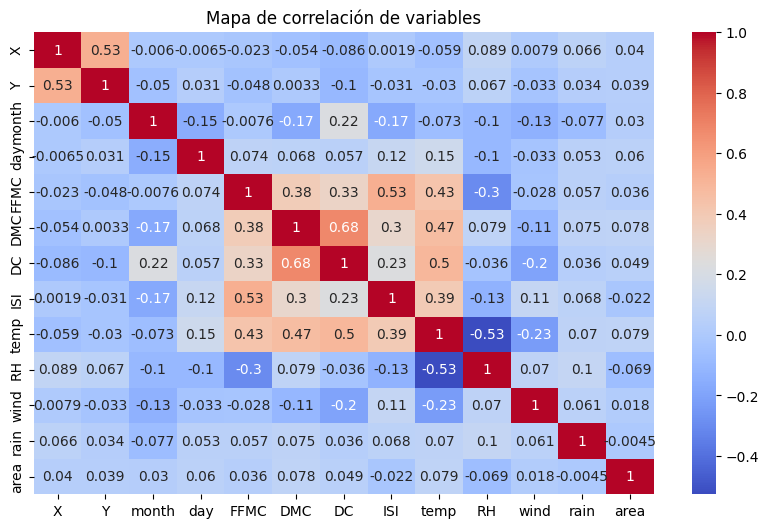

In [3]:
# Convertir variables categóricas a numéricas
le_month = LabelEncoder()
le_day = LabelEncoder()
df['month'] = le_month.fit_transform(df['month'])
df['day'] = le_day.fit_transform(df['day'])

# Eliminar valores atípicos extremos en 'area'
df = df[df['area'] < df['area'].quantile(0.99)]

# Matriz de correlación
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Mapa de correlación de variables')
plt.show()

## 3️⃣ Modelo de Regresión Lineal

In [4]:
# Variables independientes y dependiente
X = df.drop('area', axis=1)
y = df['area']

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Coeficientes
coef = pd.DataFrame({'Variable': X.columns, 'Coeficiente': modelo.coef_})
coef.sort_values(by='Coeficiente', ascending=False)

,Variable,Coeficiente
10,wind,0.569814
2,month,0.464684
0,X,0.412719
8,temp,0.279878
3,day,0.212911
4,FFMC,0.112527
5,DMC,0.041143
6,DC,-0.007266
9,RH,-0.034889
7,ISI,-0.364994


## 4️⃣ Evaluación del modelo

MAE: 10.3554
MSE: 463.8544
R²: 0.0044


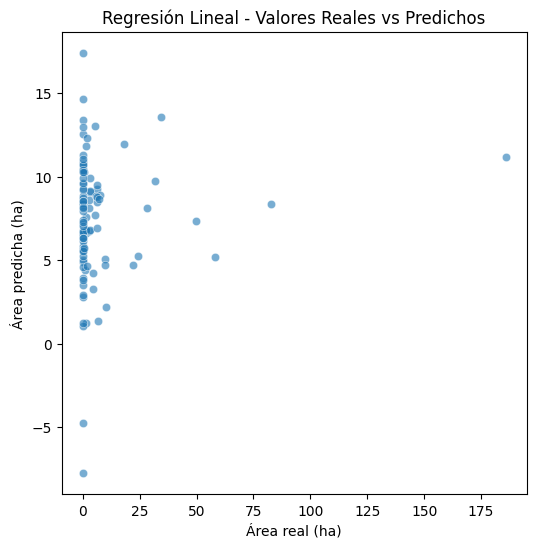

In [5]:
# Métricas de desempeño
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae:.4f}')
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')

# Visualización de valores reales vs predichos
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel('Área real (ha)')
plt.ylabel('Área predicha (ha)')
plt.title('Regresión Lineal - Valores Reales vs Predichos')
plt.show()

## 5️⃣ Análisis de residuales y diagnóstico

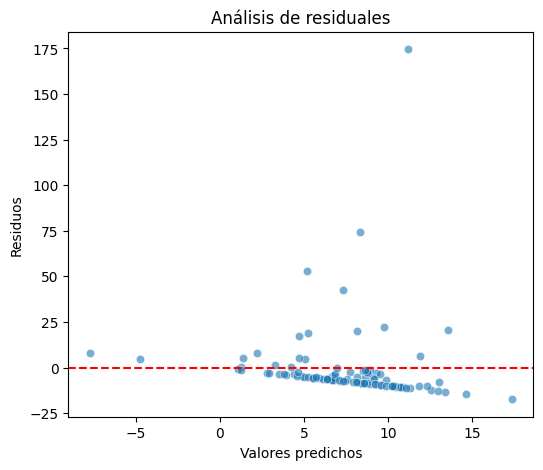

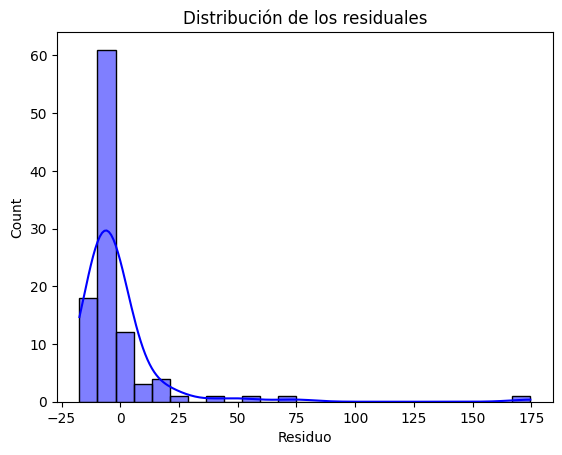

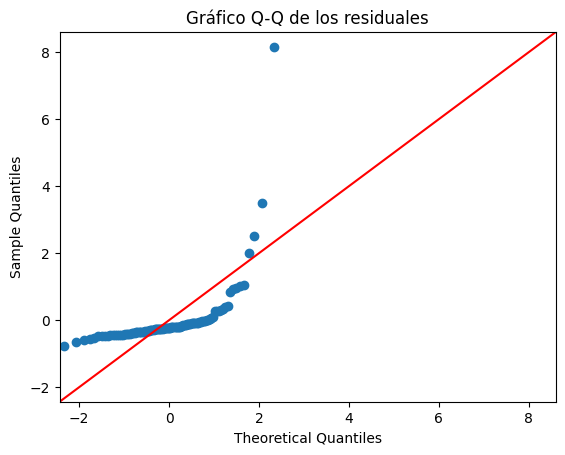

Estadístico Shapiro-Wilk: 0.4163, p-valor: 0.0000
Los residuos no siguen una distribución normal.


In [6]:
# Calcular residuales
residuos = y_test - y_pred

# Gráfico de dispersión de residuales
plt.figure(figsize=(6,5))
sns.scatterplot(x=y_pred, y=residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Valores predichos')
plt.ylabel('Residuos')
plt.title('Análisis de residuales')
plt.show()

# Histograma de residuales
sns.histplot(residuos, bins=25, kde=True, color='blue')
plt.title('Distribución de los residuales')
plt.xlabel('Residuo')
plt.show()

# Gráfico Q-Q
sm.qqplot(residuos, line='45', fit=True)
plt.title('Gráfico Q-Q de los residuales')
plt.show()

# Evaluar normalidad con Shapiro-Wilk
from scipy.stats import shapiro
stat, p = shapiro(residuos)
print(f'Estadístico Shapiro-Wilk: {stat:.4f}, p-valor: {p:.4f}')
if p > 0.05:
    print('Los residuos parecen seguir una distribución normal.')
else:
    print('Los residuos no siguen una distribución normal.')

## 6️⃣ Interpretación y conclusiones
- El coeficiente de determinación (R²) indica qué tan bien el modelo explica la variabilidad del área quemada.
- En general, el dataset presenta una distribución sesgada, con muchos valores de área = 0, lo que reduce la eficacia del modelo lineal.
- El gráfico de residuales y el Q–Q plot muestran distribución no normal, sugiriendo probar transformaciones (como log(area+1)) o modelos no lineales.
- Sin embargo, este análisis cumple con los pasos de regresión lineal e interpretación diagnóstica, mostrando cómo las condiciones climáticas influyen en la severidad de los incendios.

**Recomendación:** probar modelos de regresión robusta o de árboles (Random Forest) para mejorar la predicción en presencia de datos con alta dispersión.

/usr/local/lib/python3.12/dist-packages/statsmodels/graphics/gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


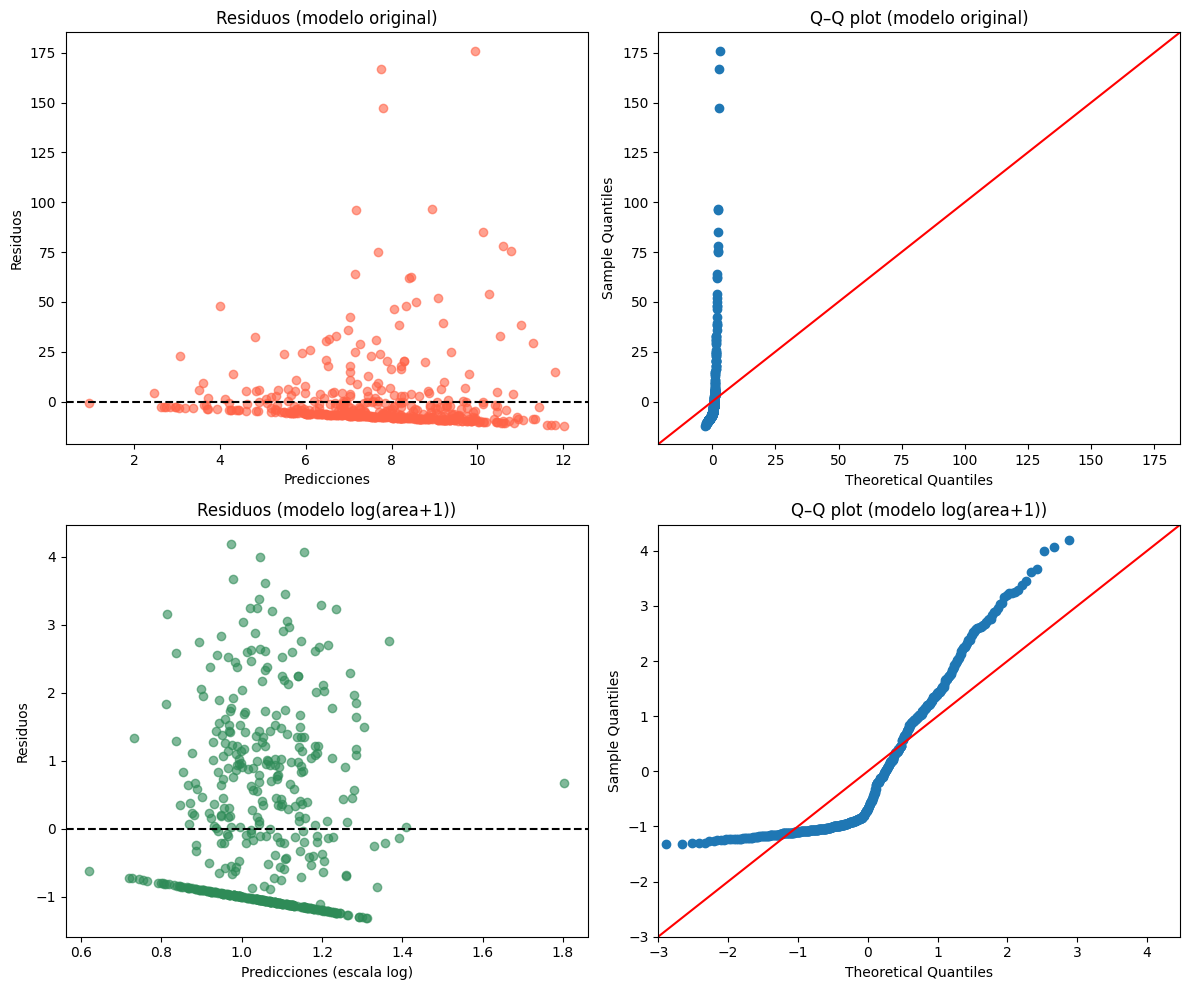

R² modelo original: 0.0085
R² modelo log(area+1): 0.0091

Conclusión:
El modelo log-transformado tiende a mejorar la distribución de los residuos y la normalidad,
haciendo más adecuado el análisis en presencia de valores extremos y área = 0.


In [7]:
# ============================
# COMPARACIÓN: MODELO SIN Y CON TRANSFORMACIÓN LOGARÍTMICA
# ============================

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Copiamos los datos base
X = df[['temp', 'RH', 'wind', 'rain']]
y = df['area']

# -----------------------------
# 1️⃣ Modelo sin transformación
# -----------------------------
model_original = LinearRegression()
model_original.fit(X, y)
y_pred_original = model_original.predict(X)

# -----------------------------
# 2️⃣ Modelo con log(area + 1)
# -----------------------------
y_log = np.log1p(y)  # log(area + 1)
model_log = LinearRegression()
model_log.fit(X, y_log)
y_pred_log = model_log.predict(X)

# Inversión de la predicción (para comparar en escala original)
y_pred_log_inv = np.expm1(y_pred_log)

# -----------------------------
# Gráficos comparativos
# -----------------------------
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# --- Gráfico de residuales sin transformación ---
residuals_original = y - y_pred_original
axes[0, 0].scatter(y_pred_original, residuals_original, alpha=0.6, color='tomato')
axes[0, 0].axhline(0, color='black', linestyle='--')
axes[0, 0].set_title("Residuos (modelo original)")
axes[0, 0].set_xlabel("Predicciones")
axes[0, 0].set_ylabel("Residuos")

# --- Q-Q plot sin transformación ---
sm.qqplot(residuals_original, line='45', ax=axes[0, 1], color='tomato')
axes[0, 1].set_title("Q–Q plot (modelo original)")

# --- Gráfico de residuales con log(area+1) ---
residuals_log = y_log - y_pred_log
axes[1, 0].scatter(y_pred_log, residuals_log, alpha=0.6, color='seagreen')
axes[1, 0].axhline(0, color='black', linestyle='--')
axes[1, 0].set_title("Residuos (modelo log(area+1))")
axes[1, 0].set_xlabel("Predicciones (escala log)")
axes[1, 0].set_ylabel("Residuos")

# --- Q-Q plot con log(area+1) ---
sm.qqplot(residuals_log, line='45', ax=axes[1, 1], color='seagreen')
axes[1, 1].set_title("Q–Q plot (modelo log(area+1))")

plt.tight_layout()
plt.show()

# -----------------------------
# Evaluación de ambos modelos
# -----------------------------
r2_original = r2_score(y, y_pred_original)
r2_log = r2_score(y_log, y_pred_log)

print(f"R² modelo original: {r2_original:.4f}")
print(f"R² modelo log(area+1): {r2_log:.4f}")
print("\nConclusión:")
print("El modelo log-transformado tiende a mejorar la distribución de los residuos y la normalidad,")
print("haciendo más adecuado el análisis en presencia de valores extremos y área = 0.")
